In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, e
from random import uniform
from tqdm import tqdm

plt.style.use('dark_background')
plt.rcParams.update({
   "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

In [2]:
def loi_normale(x,sigma=uniform(0,5),mu=uniform(-5,5)): #X suit N(mu, sigma)
    return (1/sigma*sqrt(2*pi))*np.exp(-1/2*((x-mu)/sigma)**2)

def loi_normale_centree_reduite(x): #X suit N(0,1)
    return (1/sqrt(2*pi))*np.exp((-x**2)/2)

Text(0.5, 1.0, 'Loi normale centrée réduite')

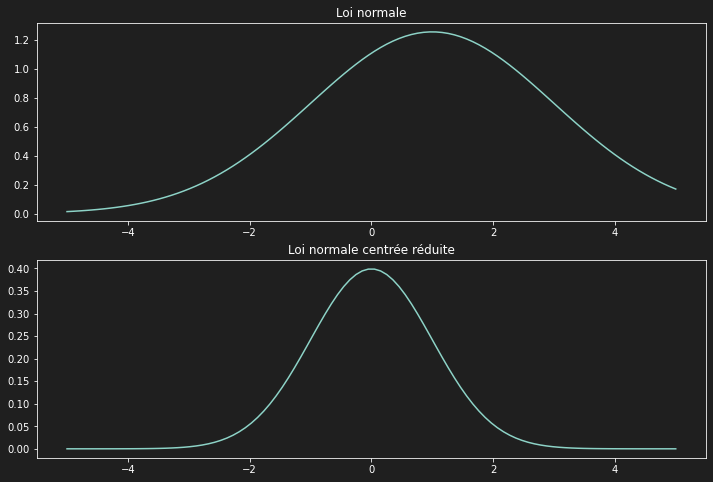

In [3]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(np.linspace(-5,5,100),loi_normale(np.linspace(-5,5,100),2,1))
plt.title(label='Loi normale')
plt.subplot(2,1,2)
plt.plot(np.linspace(-5,5,100),loi_normale_centree_reduite(np.linspace(-5,5,100)))
plt.title(label='Loi normale centrée réduite')

In [4]:
def integration(b_bas,b_haute,n,func):
    aire_1=0
    aire_2=0
    ecart=6/10*(b_haute-b_bas)
    inter=(b_haute-b_bas)/n
    for i in tqdm(range(n)):
        aire_1 += np.abs(inter * func((b_bas+(i*inter))))
        aire_2 += np.abs(inter * func((b_bas+((i+1)*inter))))
    plt.plot(np.linspace(b_bas-ecart,b_haute+ecart,n),func(np.linspace(b_bas-ecart,b_haute+ecart,n)))
    plt.fill_between(np.linspace(b_bas,b_haute,n),func(np.linspace(b_bas,b_haute,n)))
    return (aire_1+aire_2)/2

In [5]:
def f(x):
    return x**2

100%|██████████| 100/100 [00:00<00:00, 354548.10it/s]


5.334400000000001

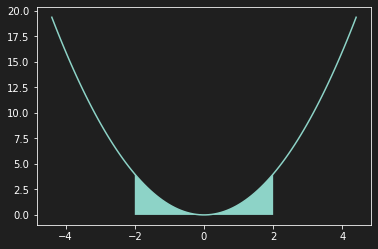

In [6]:
integration(-2,2,100,f)

100%|██████████| 100/100 [00:00<00:00, 178633.05it/s]


0.6826733605403599

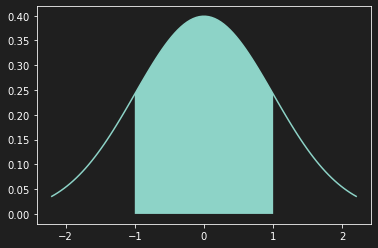

In [7]:
integration(-1,1,100,loi_normale_centree_reduite)

100%|██████████| 1000/1000 [00:00<00:00, 225803.71it/s]


1.3584069632167153

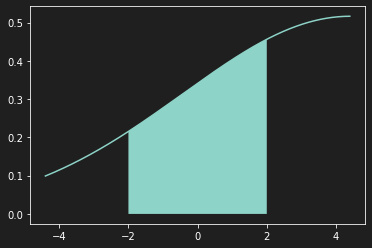

In [8]:
integration(-2,2,1000,loi_normale)

In [9]:
def p_gaussienne(x):
    f= lambda x: (1/sqrt(2*pi))*np.exp((-x**2)/2)
    return integration(-10,x,1000000,f)

100%|██████████| 1000000/1000000 [00:04<00:00, 246819.07it/s]


0.5000000000000038

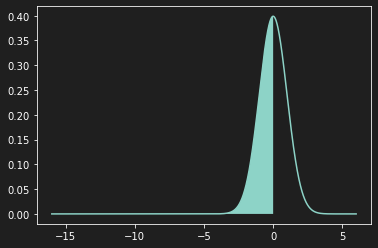

In [10]:
p_gaussienne(0)

100%|██████████| 100000/100000 [00:00<00:00, 259716.62it/s]


2.0522175694675693

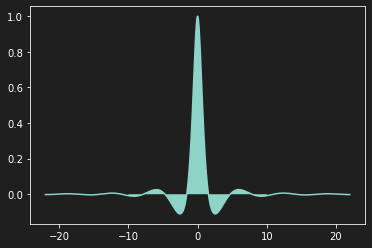

In [11]:
def g(x):
    return (np.cos(x))/(x**2+1)

integration(-10,10,100000,g)
#approximation de pi/e

100%|██████████| 10000/10000 [00:00<00:00, 147321.05it/s]


3.1415926535897714

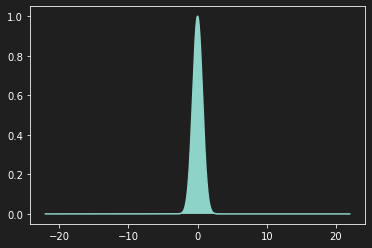

In [19]:
def racine_pi(x):
    return np.exp(-x**2)

integration(-10,10,10000,racine_pi)**2
#3.
#1415926535 8979323846 2643383279